In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
import plotly.graph_objs as go


In [2]:
gt=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859–1')
gt.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [3]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
gt.shape

(181691, 135)

In [5]:
gt.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

# Missing Value Treatment

In [6]:
gt.isnull().sum()/len(gt)*100

eventid                0.000000
iyear                  0.000000
imonth                 0.000000
iday                   0.000000
approxdate            94.914993
extended               0.000000
resolution            98.778145
country                0.000000
country_txt            0.000000
region                 0.000000
region_txt             0.000000
provstate              0.231712
city                   0.238867
latitude               2.507554
longitude              2.508104
specificity            0.003302
vicinity               0.000000
location              69.456385
summary               36.396409
crit1                  0.000000
crit2                  0.000000
crit3                  0.000000
doubtterr              0.000550
alternative           84.032781
alternative_txt       84.032781
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
attacktype2           96.524869
attackty

In [7]:
# Dropping columns with more than 50% missing values
misscol=pd.DataFrame((gt.isnull().sum()/len(gt)*100)>30)
misscol=misscol[misscol[0]==True].index
gt.drop(columns=misscol,axis=1,inplace=True)
gt.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


# Data Cleaning

In [8]:
# Checking for duplicates
gt[gt.duplicated()]

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY


In [9]:
# Dropping columns to select desired columns
gt.drop(["eventid",'country','region','attacktype1','targtype1','targsubtype1','targsubtype1_txt','weaptype1','suicide','natlty1','doubtterr','crit1','crit2','crit3','multiple','weapsubtype1','weapsubtype1_txt','property',"dbsource",'target1','specificity','corp1','vicinity','latitude','longitude',"INT_LOG","INT_IDEO","INT_MISC","INT_ANY",'guncertain1','ishostkid'],axis=1,inplace=True)

In [10]:
gt.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                   'attacktype1_txt':'Attacktype','targtype1_txt':'Target','weaptype1_txt':"Weapon",
                  'gname':'Group','natlty1_txt':'Nationality','nkill':'Killed','nwound': 'Wounded'},inplace=True)
gt.head()

,Year,Month,Day,extended,Country,Region,provstate,city,success,Attacktype,Target,Nationality,Group,individual,Weapon,Killed,Wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0,Unknown,1.0,0.0
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0,Unknown,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,1,Assassination,Journalists & Media,United States,Unknown,0,Unknown,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0,Explosives,NaN,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0,Incendiary,NaN,NaN


In [11]:
# Replacing the missing values with the respective mode
gt.Killed.fillna(gt.Killed.mode()[0],inplace=True)
gt.Wounded.fillna(gt.Wounded.mode()[0],inplace=True)
gt['casualty']=(gt['Wounded']+gt['Killed']).astype('int')

In [12]:
gt.replace('Unknown',np.NaN,inplace=True)
Group=gt.Group.value_counts()[gt.Group.value_counts()<30].index
gt.Group.fillna('Others',inplace=True)

In [13]:
gt.isnull().sum()/len(gt)*100

Year           0.000000
Month          0.000000
Day            0.000000
extended       0.000000
Country        0.000000
Region         0.000000
provstate      2.592864
city           5.618880
success        0.000000
Attacktype     4.004601
Target         3.246171
Nationality    0.858050
Group          0.000000
individual     0.000000
Weapon         8.342185
Killed         0.000000
Wounded        0.000000
casualty       0.000000
dtype: float64

In [14]:
gt.dropna(inplace=True)

In [15]:
gt[gt['Country']=='India'].shape

(9826, 18)

In [16]:
gt['Group'].value_counts()

Others                                              70625
Taliban                                              5569
Islamic State of Iraq and the Levant (ISIL)          4204
Shining Path (SL)                                    3980
Farabundo Marti National Liberation Front (FMLN)     2676
                                                    ...  
King Street                                             1
Supporters of opposing candidate Abdu Sakurtan          1
Solidarist Resistance Movement                          1
Communist Fighting Front                                1
Al-Haydariyah Battalion                                 1
Name: Group, Length: 3082, dtype: int64

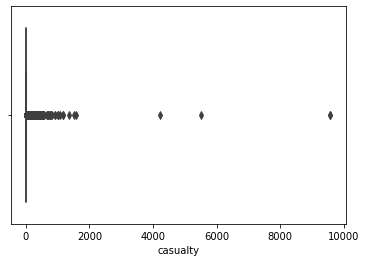

In [17]:

sns.boxplot('casualty',data=gt)

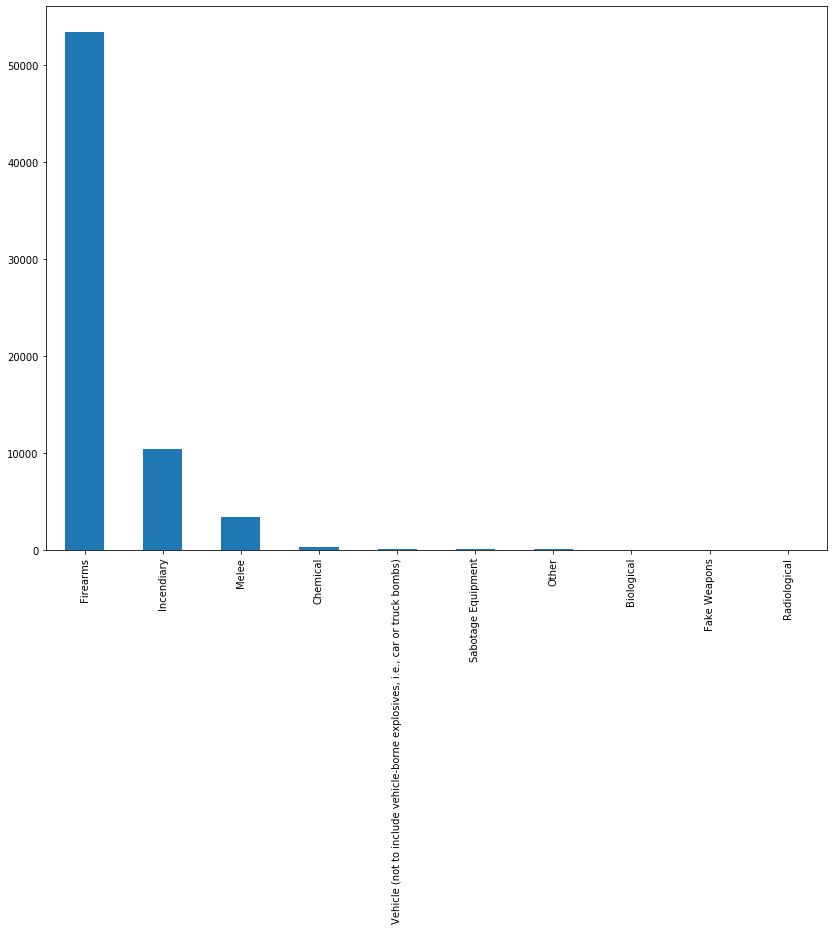

In [18]:
plt.figure(figsize=[14,10])
gt['Weapon'].value_counts()[1:].plot.bar()
plt.xticks(rotation=90)
plt.show()

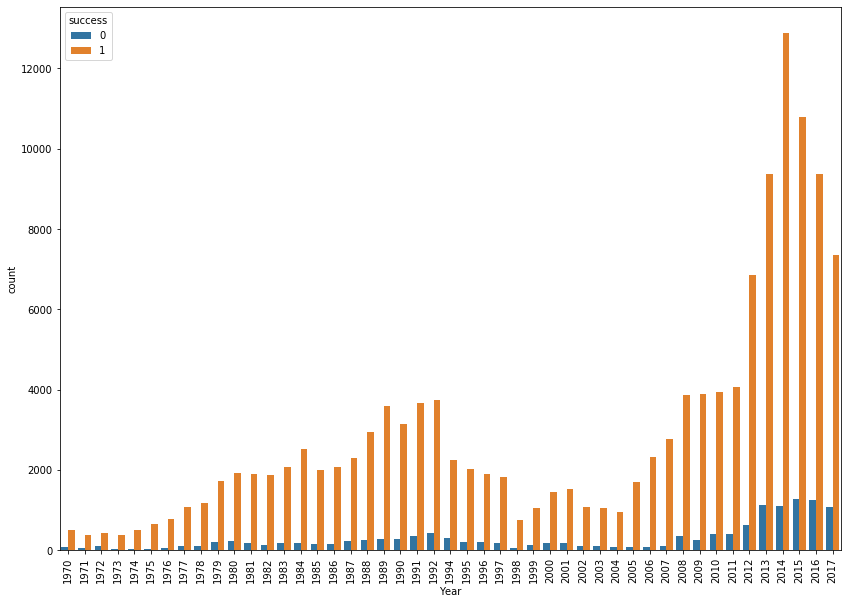

In [19]:
plt.figure(figsize=[14,10])
sns.countplot('Year',data=gt,hue='success')
plt.xticks(rotation=90)
plt.show()

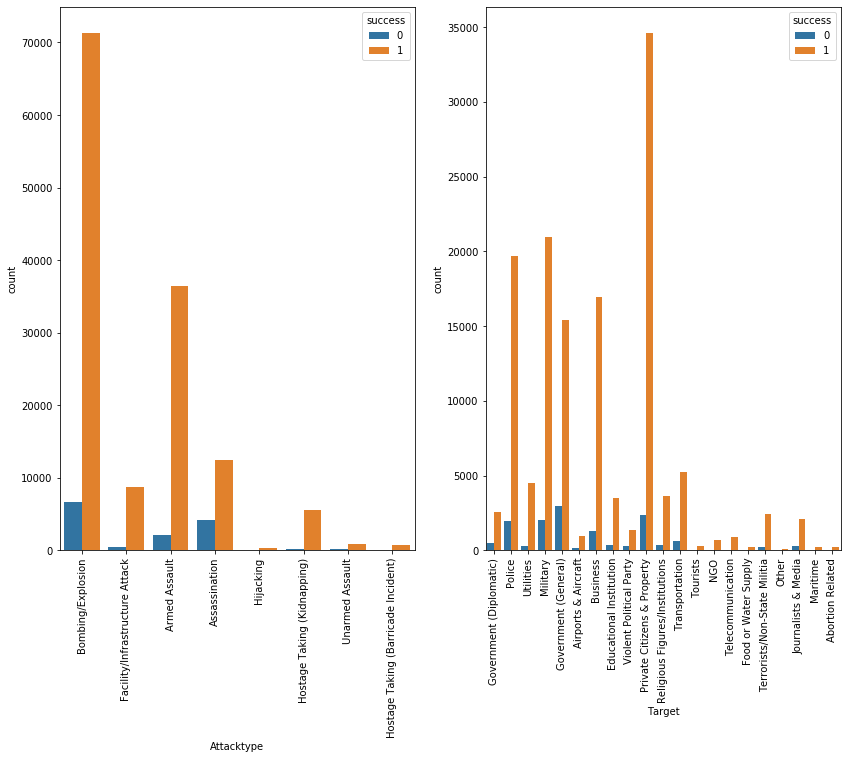

In [20]:
plt.figure(figsize=[14,10])
plt.subplot(1,2,1)
sns.countplot('Attacktype',data=gt,hue='success')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot('Target',data=gt,hue='success')
plt.xticks(rotation=90)
plt.show()

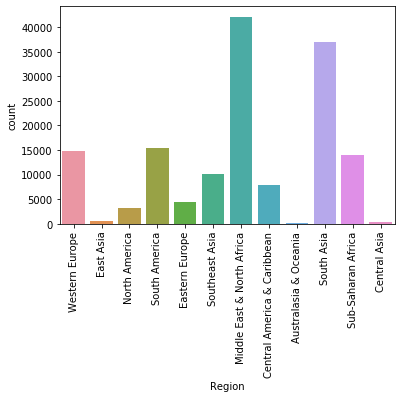

In [21]:
plt.figure()
sns.countplot('Region',data=gt)
plt.xticks(rotation=90)
plt.show()

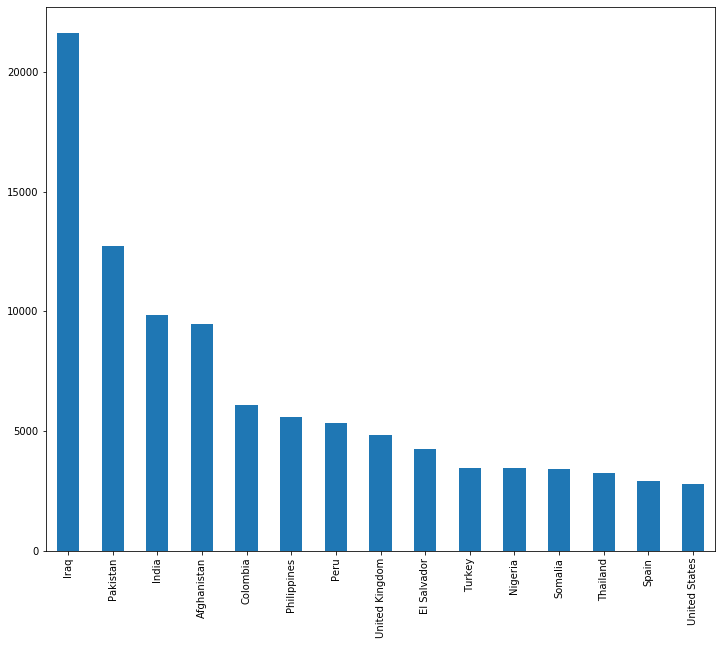

In [22]:
plt.figure(figsize=[12,10])
gt['Country'].value_counts()[:15].plot.bar()
plt.show()

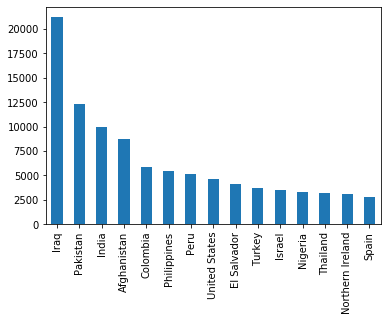

In [23]:
gt['Nationality'].value_counts()[:15].plot.bar()

In [24]:
gt['Country'].value_counts().sort_values()

St. Kitts and Nevis                     1
Turkmenistan                            1
Equatorial Guinea                       1
North Korea                             1
New Hebrides                            1
South Vietnam                           1
South Yemen                             1
St. Lucia                               1
Wallis and Futuna                       1
Vatican City                            1
Antigua and Barbuda                     1
Falkland Islands                        1
International                           1
Dominica                                2
Belize                                  2
Western Sahara                          2
Mauritius                               2
Seychelles                              2
People's Republic of the Congo          2
Gambia                                  2
French Polynesia                        2
Grenada                                 3
Solomon Islands                         3
Barbados                          

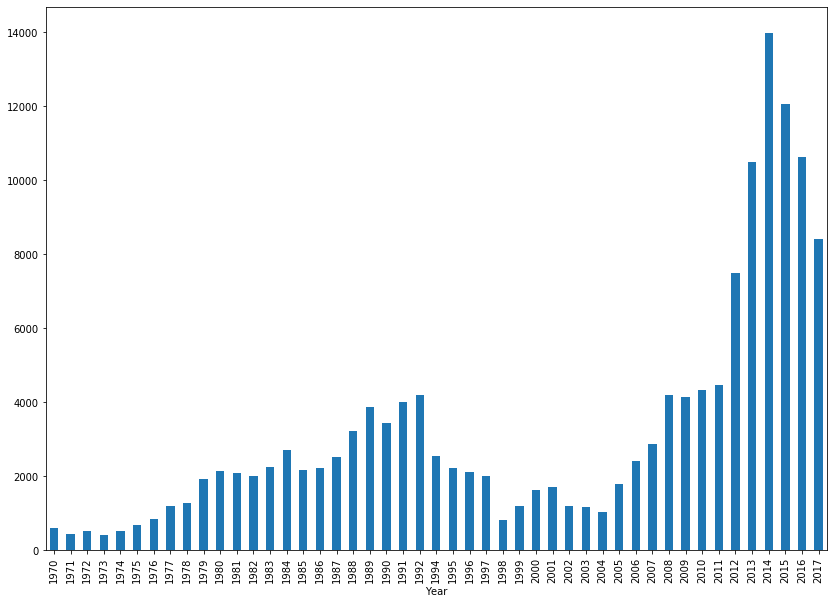

In [25]:
plt.figure(figsize=(14,10))
gt.groupby(by='Year')['casualty'].count().plot.bar()

plt.show()

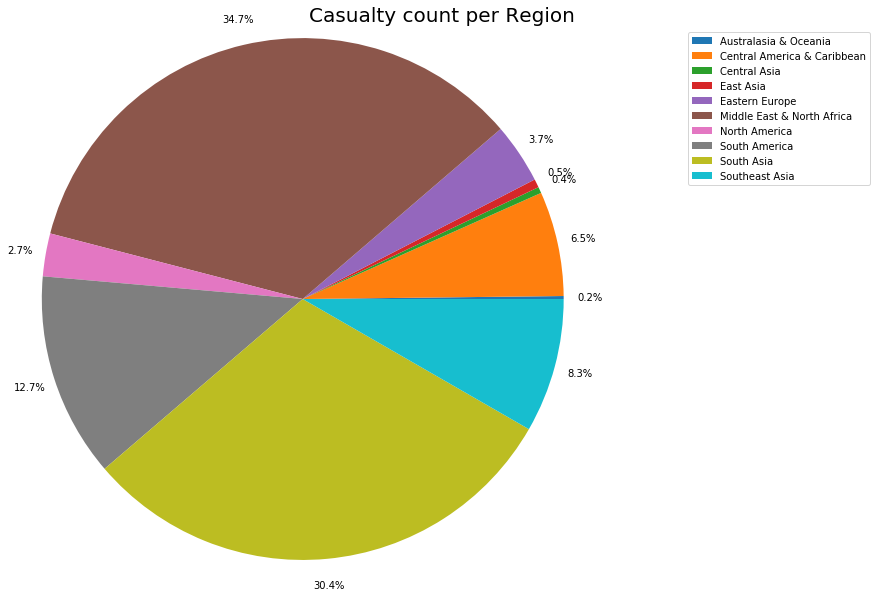

In [26]:

casualtycount=gt.groupby(by='Region')['casualty'].count()[:10]
plt.figure(figsize=(10,10))
plt.title("Casualty count per Region",loc='right',fontdict={'fontsize':20})
plt.pie(casualtycount,autopct='%0.1f%%',pctdistance=1.1,radius=1.2)

plt.legend(labels=casualtycount.index,bbox_to_anchor=(1.2,1))
plt.show()

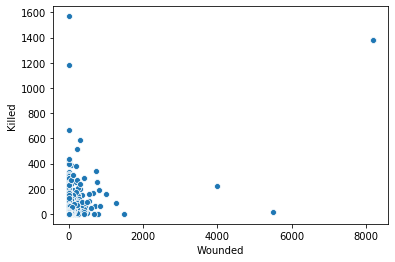

In [27]:
sns.scatterplot(x='Wounded',y='Killed',data=gt)

In [ ]:
gt['Group'].replace(Group,value='Others',inplace=True)

In [ ]:
gt.to_csv('gt.csv')